In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

---





In [2]:
energy_df = pd.read_csv('energy_dataset.csv')
weather_df = pd.read_csv('weather_features.csv')

In [3]:
energy = energy_df.copy()
weather = weather_df.copy()

In [4]:
energy.head() # show the first 5 rows of energy data

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [5]:
energy.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [6]:
weather.head() # show the first 5 rows pf weather data

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n  
2         800        clear        sky is clear          01n  
3         800        clear        sky is clear          01n  
4         800        clear        sky is clear          01n

In [7]:
weather.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

## Check 'NAN'

In [8]:
energy.isnull().values.any()

True

In [9]:
weather.isnull().values.any()

False

# Configure Dataset and Data Preprocessing

---
### Weather data configuration
+ 1. Use Madrid city's weather data. (capital of Spain)
+ 2. Use 2018 weather data.
+ 3. Drop duplicate data.

In [10]:
print(weather.city_name.value_counts())

Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: city_name, dtype: int64


In [11]:
weather.dtypes

dt_iso                  object
city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [12]:
weather = weather[weather['city_name'] == 'Madrid'] # use the Madrid weather data 스페인 수도
weather = weather.drop(['weather_icon', 'weather_id','weather_description'],axis=1) # drop data that is duplicated and is unneccesity for the training  

In [13]:
weather.reset_index()
print(weather.dtypes) 

dt_iso           object
city_name        object
temp            float64
temp_min        float64
temp_max        float64
pressure          int64
humidity          int64
wind_speed        int64
wind_deg          int64
rain_1h         float64
rain_3h         float64
snow_3h         float64
clouds_all        int64
weather_main     object
dtype: object


In [14]:
## Create 'datetime' column which is version of deleting unneccesary part of the 'dt_iso' and make it to index
weather['datetime'] = weather.dt_iso.str.split('+').str[0]
weather = weather.drop(['dt_iso'],axis=1)

In [15]:
weather = weather.drop(['city_name'],axis=1)
weather

temp  temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  \
35145  267.325   267.325   267.325       971        63           1       309   
35146  267.325   267.325   267.325       971        63           1       309   
35147  266.186   266.186   266.186       971        64           1       273   
35148  266.186   266.186   266.186       971        64           1       273   
35149  266.186   266.186   266.186       971        64           1       273   
...        ...       ...       ...       ...       ...         ...       ...   
71407  283.560   282.150   285.150      1030        88           1       280   
71408  280.120   278.150   281.150      1031        52           1       260   
71409  278.150   278.150   278.150      1030        65           1       340   
71410  276.570   276.150   277.150      1031        69           2       340   
71411  275.150   275.150   275.150      1031        74           1       360   

       rain_1h  rain_3h  snow_3h  clouds_all weather_main             datetime  
35145      0.0      0.0      0.0           0        clear  2015-01-01 00:00:00  
35146      0.0      0.0      0.0           0        clear  2015-01-01 01:00:00  
35147      0.0      0.0      0.0           0        clear  2015-01-01 02:00:00  
35148      0.0      0.0      0.0           0        clear  2015-01-01 03:00:00  
35149      0.0      0.0      0.0           0        clear  2015-01-01 04:00:00  
...        ...      ...      ...         ...          ...                  ...  
71407      0.0      0.0      0.0           0        clear  2018-12-31 19:00:00  
71408      0.0      0.0      0.0           0        clear  2018-12-31 20:00:00  
71409      0.0      0.0      0.0           0        clear  2018-12-31 21:00:00  
71410      0.0      0.0      0.0           0        clear  2018-12-31 22:00:00  
71411      0.0      0.0      0.0           0        clear  2018-12-31 23:00:00  

[36267 rows x 13 columns]

### Energy data configuration

In [16]:
energy.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [17]:
energy.isnull().sum(axis=0)

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [18]:
# Display the rows with null values
energy[energy.isnull().any(axis=1)].tail()

time  generation biomass  \
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  ...  generation waste  generation wind offshore  \
35059                    0.0  ...             277.0                       0.0   
35060                    0.0  ...             280.0                       0.0   
35061                    0.0  ...             286.0                       0.0   
35062                    0.0  ...             287.0                       0.0   
35063                    0.0  ...             287.0                       0.0   

       generation wind onshore  forecast solar day ahead  \
35059                   3113.0                      96.0   
35060                   3288.0                      51.0   
35061                   3503.0                      36.0   
35062                   3586.0                      29.0   
35063                   3651.0                      26.0   

       forecast wind offshore eday ahead  forecast wind onshore day ahead  \
35059                                NaN                           3253.0   
35060                                NaN                           3353.0   
35061                                NaN                           3404.0   
35062                                NaN                           3273.0   
35063                                NaN                           3117.0   

       total load forecast  total load actual  price day ahead  price actual  
35059              30619.0            30653.0            68.85         77.02  
35060              29932.0            29735.0            68.40         76.16  
35061              27903.0            28071.0            66.88         74.30  
35062              25450.0            25801.0            63.93         69.89  
35063              24424.0            24455.0            64.27         69.88  

[5 rows x 29 columns]

In [19]:
# Fill null values using interpolation
energy.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [20]:
energy.isnull().sum(axis=0)

time                                               0
generation biomass                                 0
generation fossil brown coal/lignite               0
generation fossil coal-derived gas                 0
generation fossil gas                              0
generation fossil hard coal                        0
generation fossil oil                              0
generation fossil oil shale                        0
generation fossil peat                             0
generation geothermal                              0
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption        0
generation hydro run-of-river and poundage         0
generation hydro water reservoir                   0
generation marine                                  0
generation nuclear                                 0
generation other                                   0
generation other renewable                         0
generation solar                              

In [21]:
energy.reset_index()

index                       time  generation biomass  \
0          0  2015-01-01 00:00:00+01:00               447.0   
1          1  2015-01-01 01:00:00+01:00               449.0   
2          2  2015-01-01 02:00:00+01:00               448.0   
3          3  2015-01-01 03:00:00+01:00               438.0   
4          4  2015-01-01 04:00:00+01:00               428.0   
...      ...                        ...                 ...   
35059  35059  2018-12-31 19:00:00+01:00               297.0   
35060  35060  2018-12-31 20:00:00+01:00               296.0   
35061  35061  2018-12-31 21:00:00+01:00               292.0   
35062  35062  2018-12-31 22:00:00+01:00               293.0   
35063  35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  ...  \
0                              0.0                     0.0  ...   
1                              0.0                     0.0  ...   
2                              0.0                     0.0  ...   
3                              0.0                     0.0  ...   
4                              0.0                     0.0  ...   
...                            ...                     ...  ...   
35059                          0.0                     0.0  ...   
35060                          0.0                     0.0  ...   
35061                          0.0                     0.0  ...   
35062                          0.0                     0.0  ...   
35063                          0.0                     0.0  ...   

       generation waste  generation wind offshore  generation wind onshore  \
0                 196.0                       0.0                   6378.0   
1                 195.0                       0.0                   5890.0   
2                 196.0                       0.0                   5461.0   
3                 

In [22]:
## Create 'datetime' column which is version of deleting unneccesary part of the 'dt_iso' and make it to index
energy['datetime'] = energy.time.str.split('+').str[0]
energy = energy.drop(['time'],axis=1)

In [23]:
energy

generation biomass  generation fossil brown coal/lignite  \
0                   447.0                                 329.0   
1                   449.0                                 328.0   
2                   448.0                                 323.0   
3                   438.0                                 254.0   
4                   428.0                                 187.0   
...                   ...                                   ...   
35059               297.0                                   0.0   
35060               296.0                                   0.0   
35061               292.0                                   0.0   
35062               293.0                                   0.0   
35063               290.0                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
0                        0.0                                         NaN  ...   
1                        0.0                                         NaN  ...   
2                        0.0                                         NaN  ...   
3                        0.0                                         NaN  ...   
4                        0.0                                         NaN  ...   
...                      ...                                         ...  ...   
35059                    0.0                                         NaN  ...   
35060                    0.0                                         NaN  ...   
35061                    0.0                                         NaN  ...   
35062                    0.0                                         NaN  ...   
35063           

## 여기까지 완료!




### Data Cleaning and Mergy dataset

In [24]:
energy.shape # check shape of energy data

(35064, 29)

In [25]:
weather.shape # check shape of weather data

(36267, 13)

In [26]:
energy.eq(0).sum().to_frame(name="zero values") # check zero value

zero values
generation biomass                                     4
generation fossil brown coal/lignite               10524
generation fossil coal-derived gas                 35064
generation fossil gas                                  1
generation fossil hard coal                            3
generation fossil oil                                  3
generation fossil oil shale                        35064
generation fossil peat                             35064
generation geothermal                              35064
generation hydro pumped storage aggregated             0
generation hydro pumped storage consumption        12614
generation hydro run-of-river and poundage             3
generation hydro water reservoir                       3
generation marine                                  35064
generation nuclear                                     3
generation other                                       4
generation other renewable                             3
generation solar                                       3
generation waste                                       3
generation wind offshore                           35064
generation wind onshore                                3
forecast solar day ahead                             539
forecast wind offshore eday ahead                      0
forecast wind onshore day ahead                        0
total load forecast                                    0
total load actual                                      0
price day ahead                                        0
price actual                                           0
datetime                                               0

In [27]:
energy.drop(["generation fossil coal-derived gas",
                  "generation fossil oil shale",
                  "generation fossil peat",
                  "generation geothermal",
                  "generation marine",
                  "generation hydro pumped storage aggregated",
                  "generation wind offshore",
                  "forecast wind offshore eday ahead"],
                 axis=1,
                 inplace=True)

In [28]:
# 동일한 시간을 merge 하기 위해 duplicate data 제거 -> 행 개수 맞춤
energy = energy.drop_duplicates(subset="datetime", keep="first")
energy.shape

(35060, 21)

In [29]:
weather = weather.drop_duplicates(subset="datetime", keep="first")
weather.shape

(35060, 13)

In [30]:
full = pd.merge(energy, weather, on='datetime')

In [31]:
full_df = full.copy()

In [32]:
## Create year, month, day, hour, day_name column
full_df['datetime']= pd.to_datetime(full_df['datetime'])
full_df['year'] = full_df['datetime'].dt.year
full_df['month'] = full_df['datetime'].dt.month
full_df['day'] = full_df['datetime'].dt.day
full_df['hour'] = full_df['datetime'].dt.hour
full_df['day_name'] = full_df['datetime'].dt.day_name()
full_df = full_df.set_index('datetime')

In [33]:
full_df.head()

generation biomass  generation fossil brown coal/lignite  \
datetime                                                                        
2015-01-01 00:00:00               447.0                                 329.0   
2015-01-01 01:00:00               449.0                                 328.0   
2015-01-01 02:00:00               448.0                                 323.0   
2015-01-01 03:00:00               438.0                                 254.0   
2015-01-01 04:00:00               428.0                                 187.0   

                     generation fossil gas  generation fossil hard coal  \
datetime                                                                  
2015-01-01 00:00:00                 4844.0                       4821.0   
2015-01-01 01:00:00                 5196.0                       4755.0   
2015-01-01 02:00:00                 4857.0                       4581.0   
2015-01-01 03:00:00                 4314.0                       4131.0   
2015-01-01 04:00:00                 4130.0                       3840.0   

                     generation fossil oil  \
datetime                                     
2015-01-01 00:00:00                  162.0   
2015-01-01 01:00:00                  158.0   
2015-01-01 02:00:00                  157.0   
2015-01-01 03:00:00                  160.0   
2015-01-01 04:00:00                  156.0   

                     generation hydro pumped storage consumption  \
datetime                                                           
2015-01-01 00:00:00                                        863.0   
2015-01-01 01:00:00                                        920.0   
2015-01-01 02:00:00                                       1164.0   
2015-01-01 03:00:00                                       1503.0   
2015-01-01 04:00:00                                       1826.0   

                     generation hydro run-of-river and poundage  \
datetime                                                          
2015-01-01 00:00:00                                      1051.0   
2015-01-01 01:00:00                                      1009.0   
2015-01-01 02:00:00                                       973.0   
2015-01-01 03:00:00                                       949.0   
2015-01-01 04:00:00                                       953.0   

                     generation hydro water reservoir  generation nuclear  \
datetime                                                                    
2015-01-01 00:00:00                            1899.0              7096.0   
2015-01-01 01:00:00                            1658.0              7096.0   
2015-01-01 02:00:00                            1371.0              7099.0   
2015-01-01 03:00:00                             779.0              7098.0   
2015-01-01 04:00:00                             720.0              7097.0   

                     generation other  ...  rain_1h  rain_3h  snow_3h  \
datetime                               ...                              
2015-01-01 00:00:00              43.0  ...      0.0      0.0      0.0   
2015-01-01 01:00:00              43.0  ...      0.0      0.0      0.0   
2015-01-01 02:00:00              43.0  ...      0.0      0.0      0.0   
2015-01-01 03:00:00              43.0  ...      0.0      0.0      0.0   
2015-01-01 04:00:00              43.0  ...      0.0      0.0      0.0   

                     clouds_all  weather_main  year  month  day  hour  \
datetime                                                                
2015-01-01 00:00:00           0         clear  2015      1    1     0   
2015-01-01 01:00:00           0         clear  2015      1    1     1   
2015-01-01 02:00:00           0         clear  2015      1    1     2   
2015-01-01 03:00:00           0         clear  2015      1    1     3   
2015-01-01 04:00:00           0         clear  2015      1    1     4   

                     day_name  
datetime                       
2015-01-01 00:00:00  Thursday

In [34]:
full_df.dtypes

generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation waste                               float64
generation wind onshore                        float64
forecast solar day ahead                       float64
forecast wind onshore day ahead                float64
total load forecast                            float64
total load actual                              float64
price day 

# Exploratory Data Analysis (EDA) 

## 1. Overall Data Analysis

In [35]:
full_df = full_df[full_df['price actual'].notna()] # delete N/A value in price(final target variable) actual column

In [36]:
full_df = full_df = full_df.drop(['weather_main', 'day_name'],axis=1) # drop object type data

## 2. Observation of individual attribute values of data

## Energy

In [37]:
full_df.plot(y=['generation biomass'], figsize=(30, 6), grid=True)

<AxesSubplot:xlabel='datetime'>

<AxesSubplot:xlabel='datetime'>

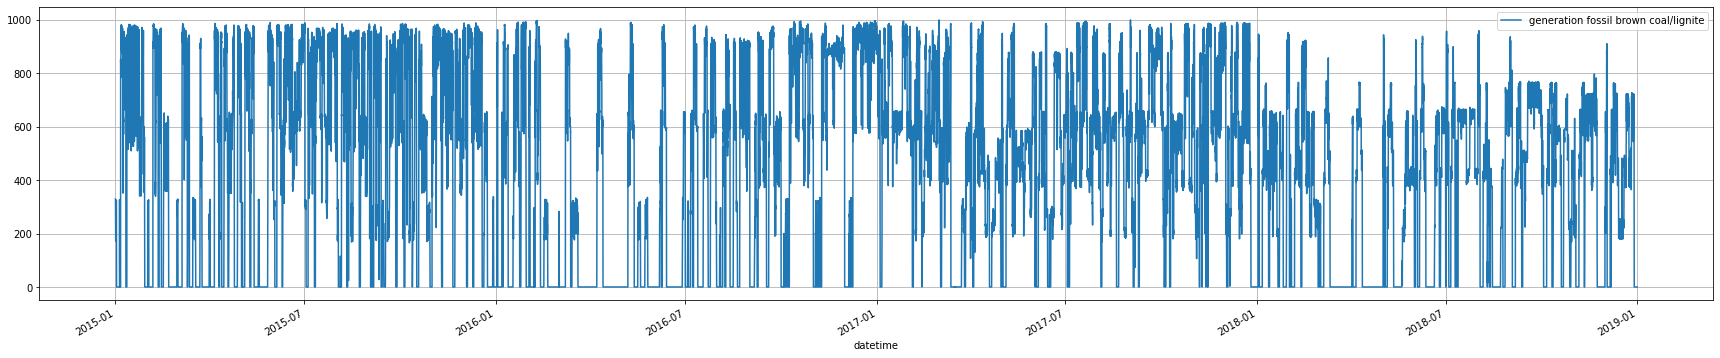

In [38]:
full_df.plot(y=['generation fossil brown coal/lignite'], figsize=(30, 6), grid=True)

<AxesSubplot:xlabel='datetime'>

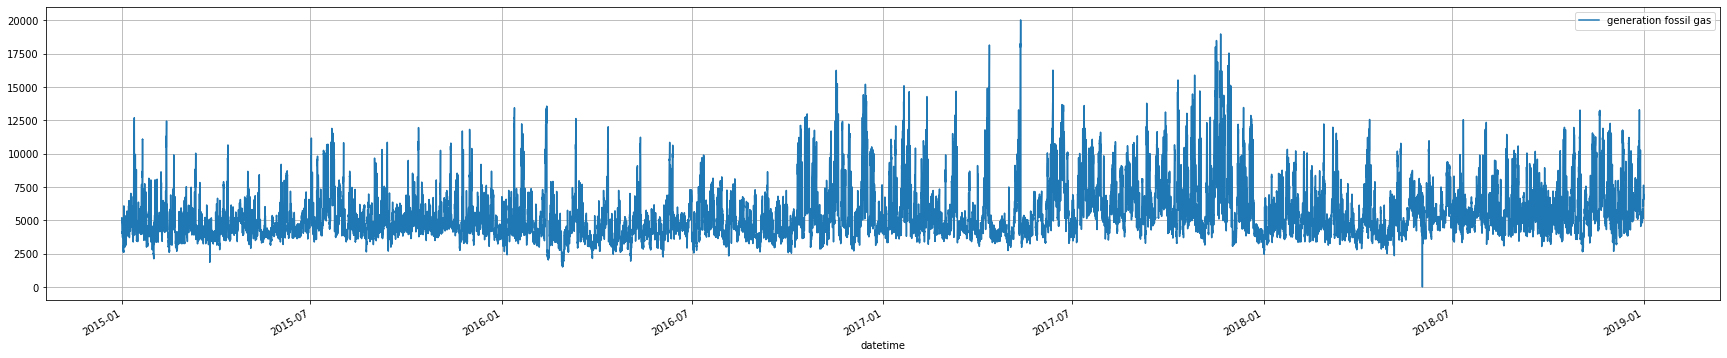

In [39]:
full_df.plot(y=['generation fossil gas'], figsize=(30, 6), grid=True)

<AxesSubplot:xlabel='datetime'>

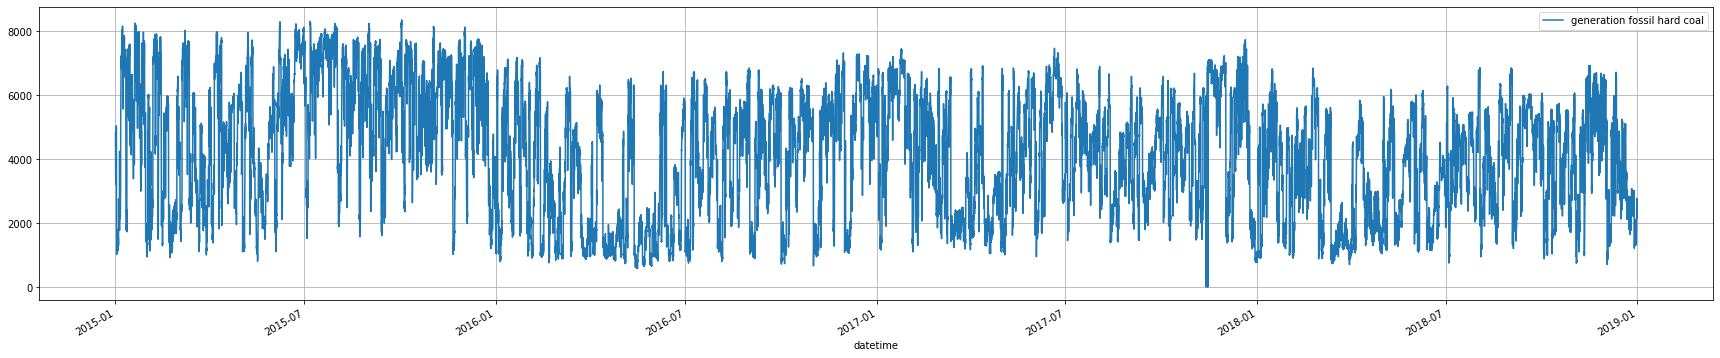

In [40]:
full_df.plot(y=['generation fossil hard coal'], figsize=(30, 6), grid=True)

In [41]:
full_df.plot(y=['generation fossil oil'], figsize=(30,6), grid=True)

<AxesSubplot:xlabel='datetime'>

In [42]:
full_df.plot(y=['generation hydro pumped storage consumption'], figsize=(30,6), grid=True)


<AxesSubplot:xlabel='datetime'>

In [43]:
full_df.plot(y=['generation hydro run-of-river and poundage'], figsize=(30,6), grid=True)

<AxesSubplot:xlabel='datetime'>

In [44]:
full_df.plot(y=['generation hydro water reservoir'], figsize=(30,6), grid=True)

<AxesSubplot:xlabel='datetime'>

<AxesSubplot:xlabel='datetime'>

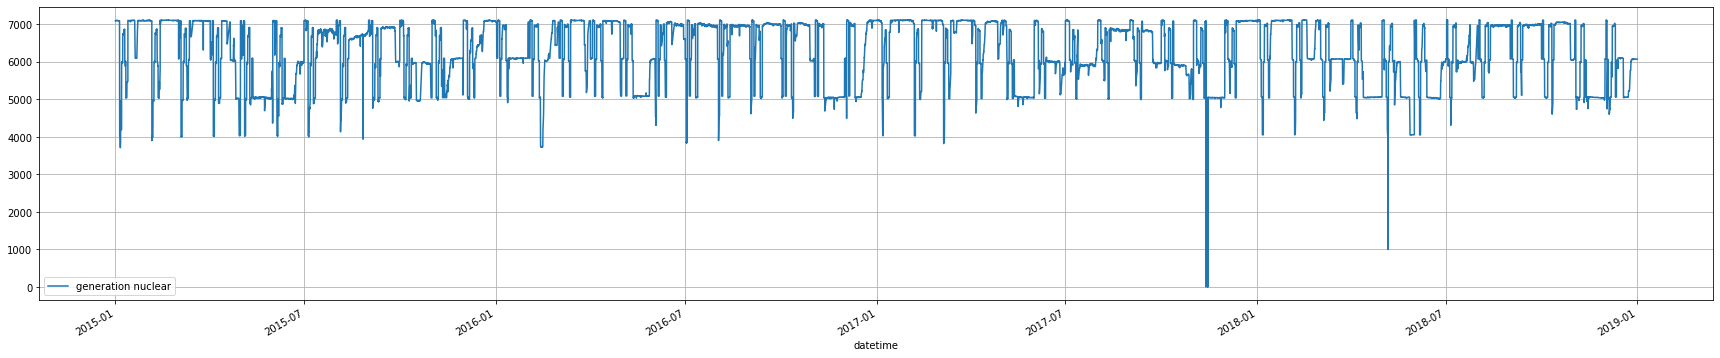

In [45]:
full_df.plot(y=['generation nuclear'], figsize=(30,6), grid=True)

In [46]:
full_df.plot(y=['generation other'], figsize=(30,6), grid=True)

<AxesSubplot:xlabel='datetime'>

In [47]:
full_df.plot(y=['generation other renewable'], figsize=(30,6), grid=True)

<AxesSubplot:xlabel='datetime'>

<AxesSubplot:xlabel='datetime'>

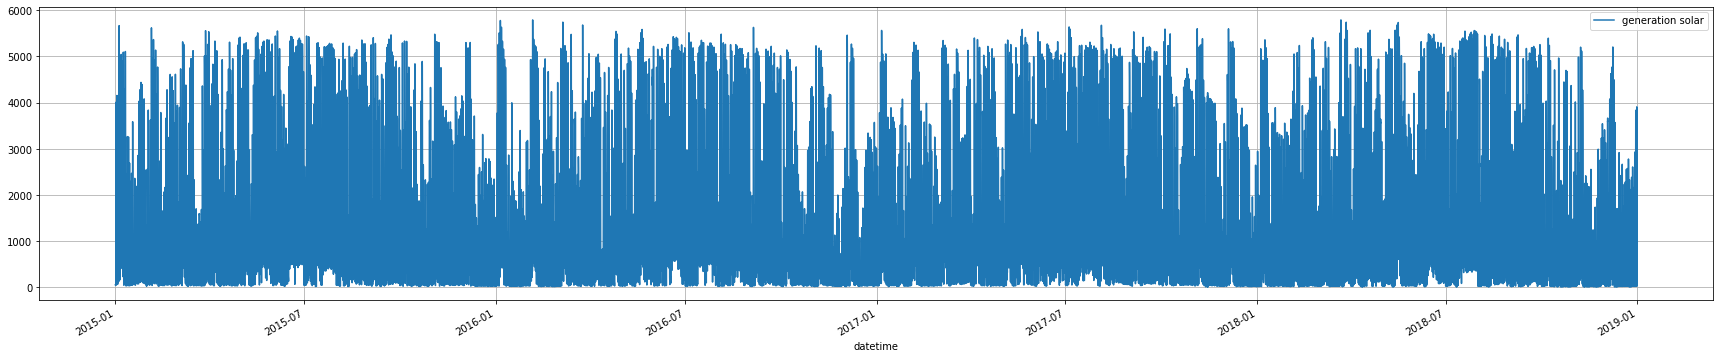

In [48]:
full_df.plot(y=['generation solar'], figsize=(30,6), grid=True)

<AxesSubplot:xlabel='datetime'>

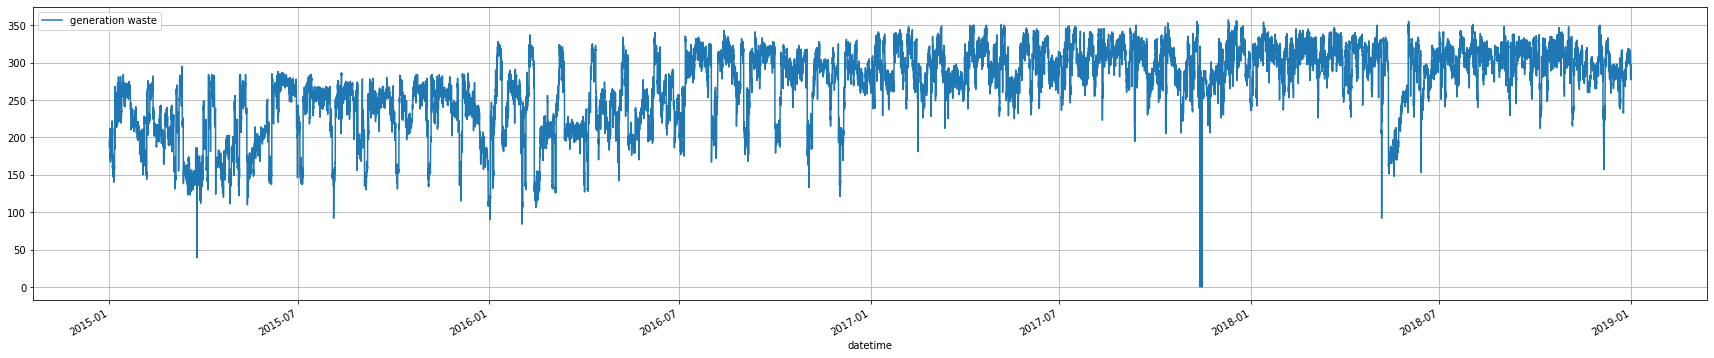

In [49]:
full_df.plot(y=['generation waste'], figsize=(30,6), grid=True)

In [50]:
full_df.plot(y=['generation wind onshore'], figsize=(30,6), grid=True)

<AxesSubplot:xlabel='datetime'>

<AxesSubplot:title={'center':'Weather features of each id'}, xlabel='datetime'>

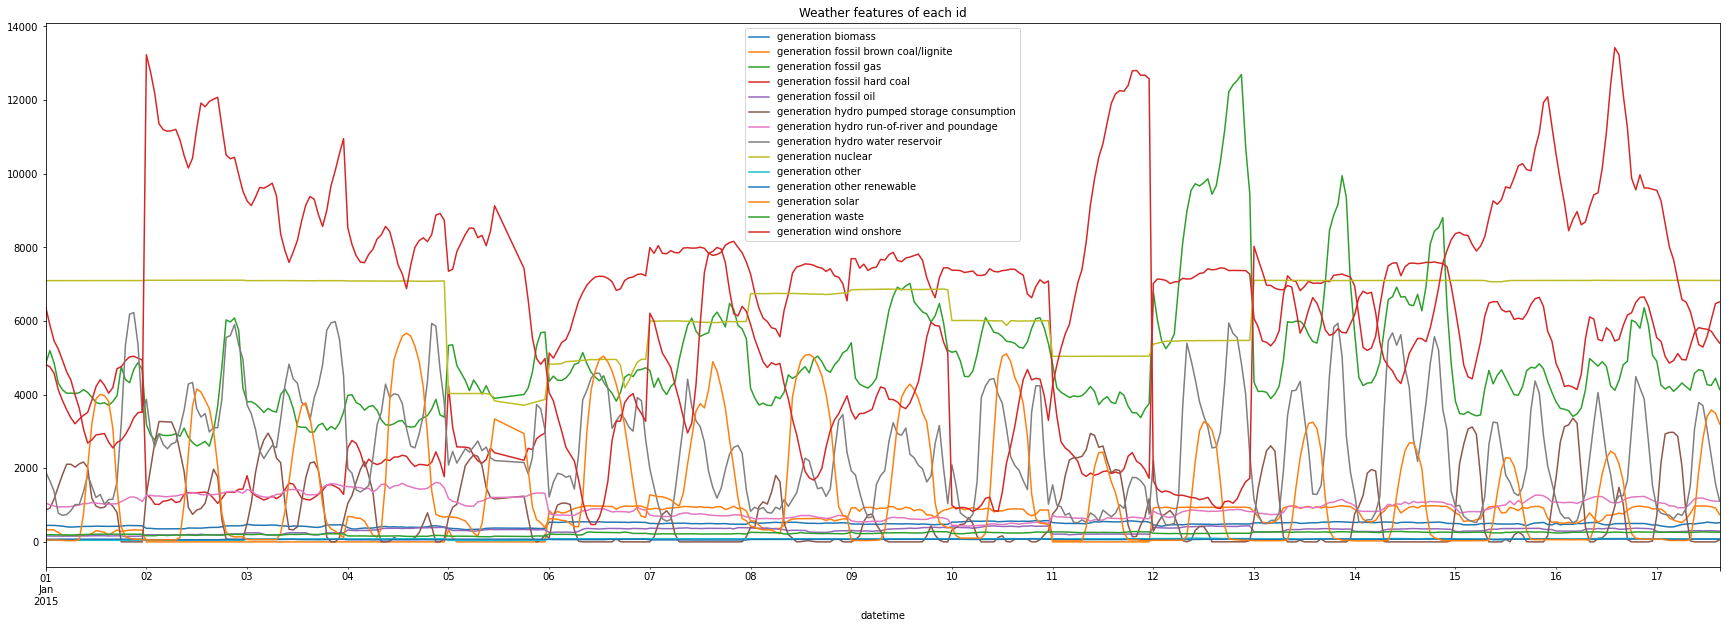

In [51]:
# to see the energy generation distribution
full_df_energy = full_df[['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas','generation fossil hard coal' ,
                   'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 
                   'generation nuclear' ,'generation other','generation other renewable','generation solar', 'generation waste','generation wind onshore']]
full_df_energy[:400].plot(figsize=(30,10),title='Weather features of each id')

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [53]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(full_df_energy.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})

NameError: name 'sns' is not defined

## Weather

In [54]:
full_df.dtypes

generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation waste                               float64
generation wind onshore                        float64
forecast solar day ahead                       float64
forecast wind onshore day ahead                float64
total load forecast                            float64
total load actual                              float64
price day 

In [55]:
full_df.plot(y=['temp'], figsize=(30, 6), grid=True)

<AxesSubplot:xlabel='datetime'>

In [56]:
full_df.plot(y=['temp_min'], figsize=(30, 6), grid=True)

<AxesSubplot:xlabel='datetime'>

<AxesSubplot:xlabel='datetime'>

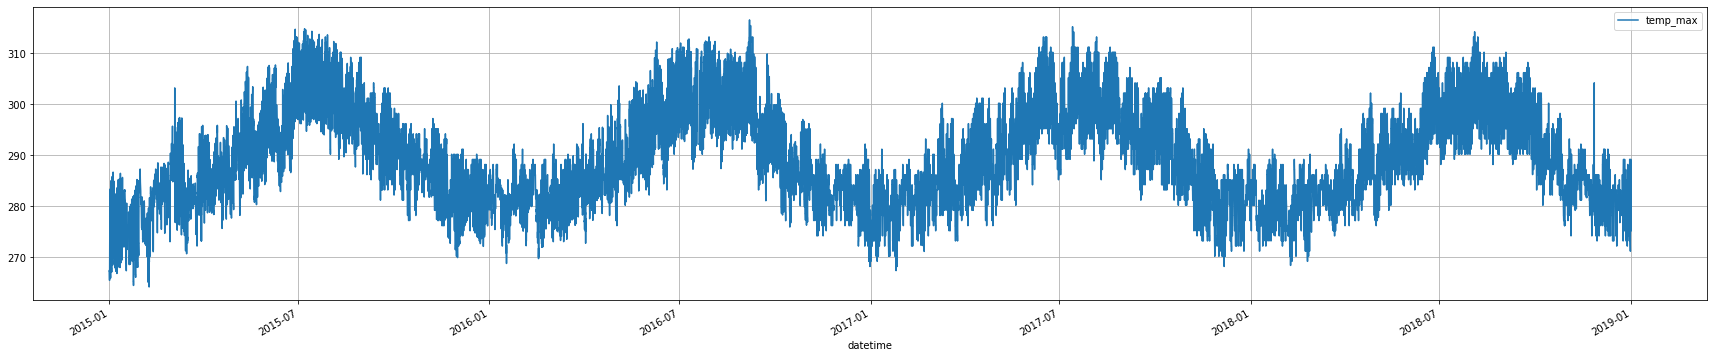

In [57]:
full_df.plot(y=['temp_max'], figsize=(30, 6), grid=True)

<AxesSubplot:xlabel='datetime'>

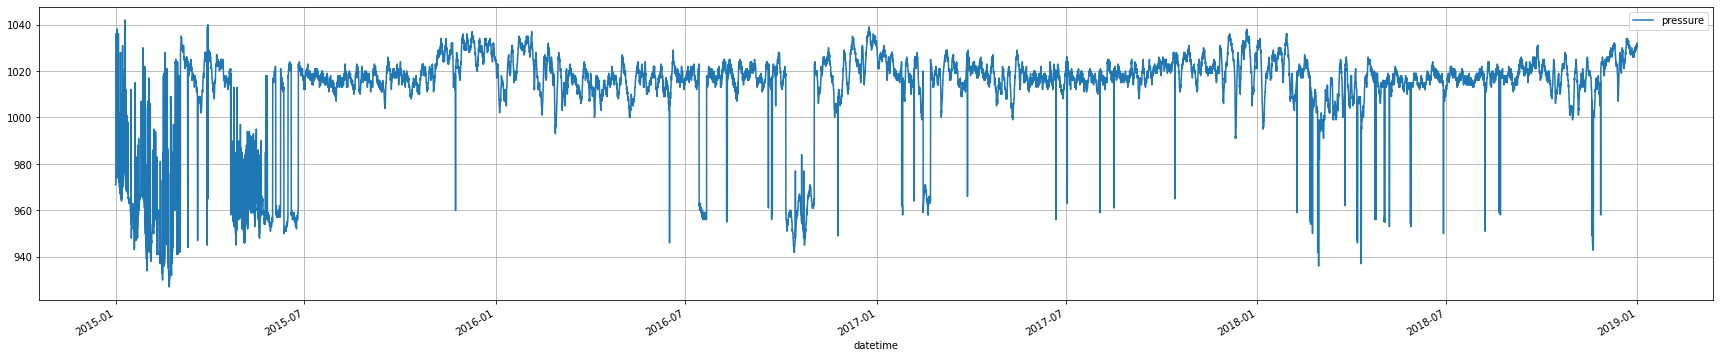

In [58]:
full_df.plot(y=['pressure'], figsize=(30, 6), grid=True)

<AxesSubplot:xlabel='datetime'>

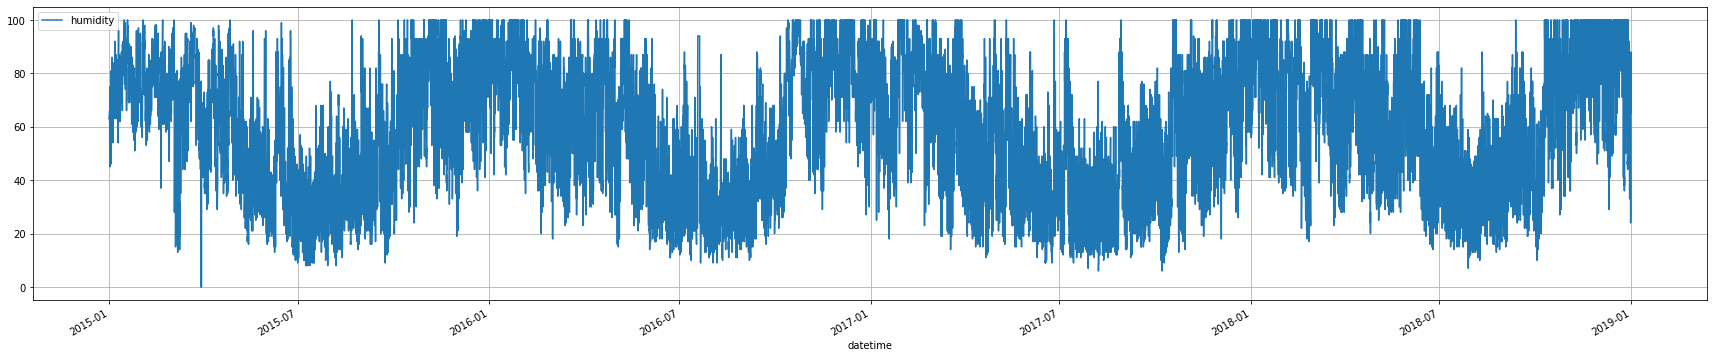

In [59]:
full_df.plot(y=['humidity'], figsize=(30, 6), grid=True)

<AxesSubplot:xlabel='datetime'>

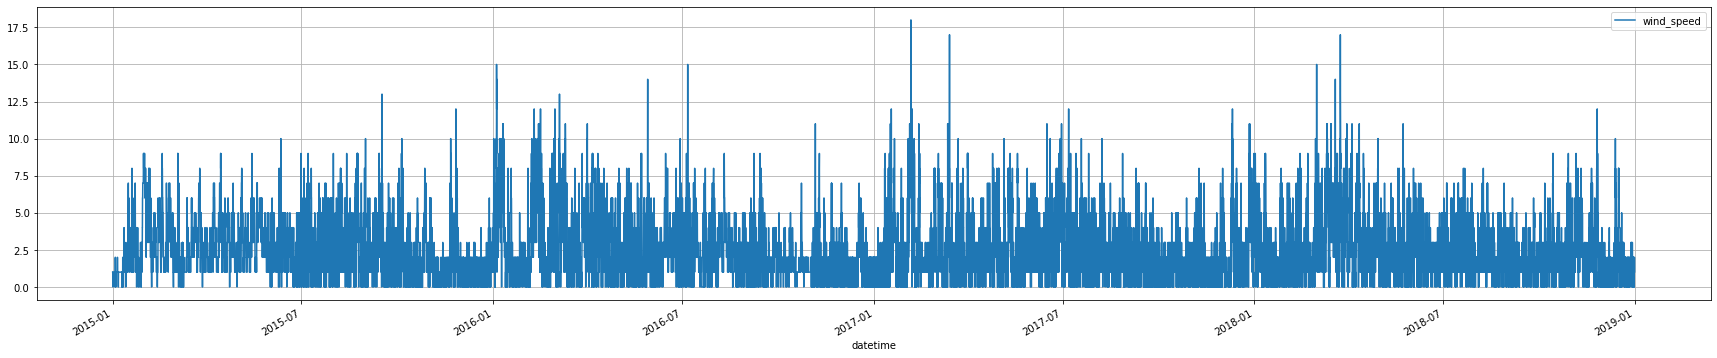

In [60]:
full_df.plot(y=['wind_speed'], figsize=(30, 6), grid=True)

<AxesSubplot:xlabel='datetime'>

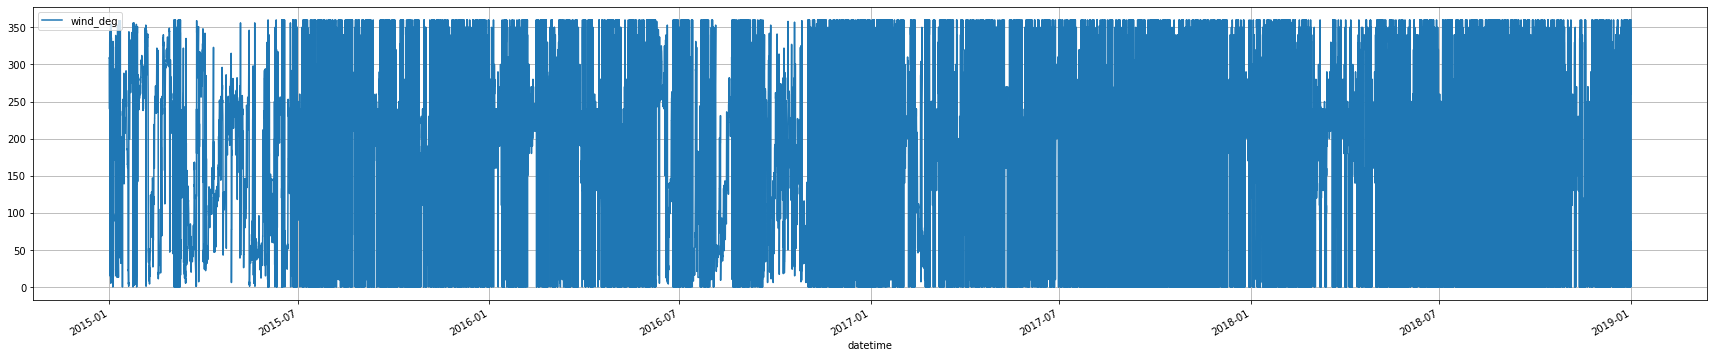

In [61]:
full_df.plot(y=['wind_deg'], figsize=(30, 6), grid=True)

<AxesSubplot:xlabel='datetime'>

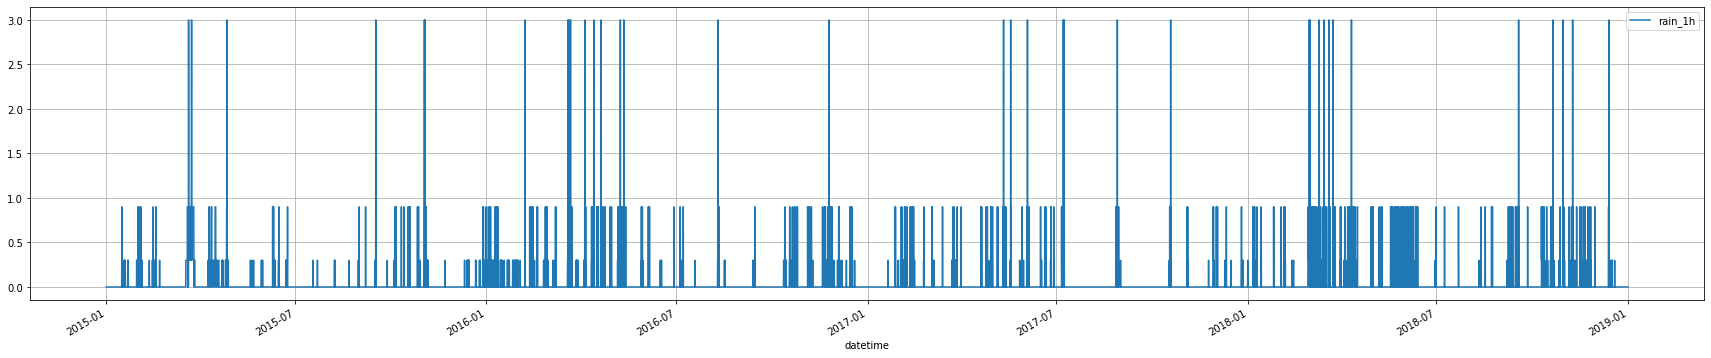

In [62]:
full_df.plot(y=['rain_1h'], figsize=(30, 6), grid=True)

In [63]:
full_df.plot(y=['rain_3h'], figsize=(30, 6), grid=True)

<AxesSubplot:xlabel='datetime'>

<AxesSubplot:xlabel='datetime'>

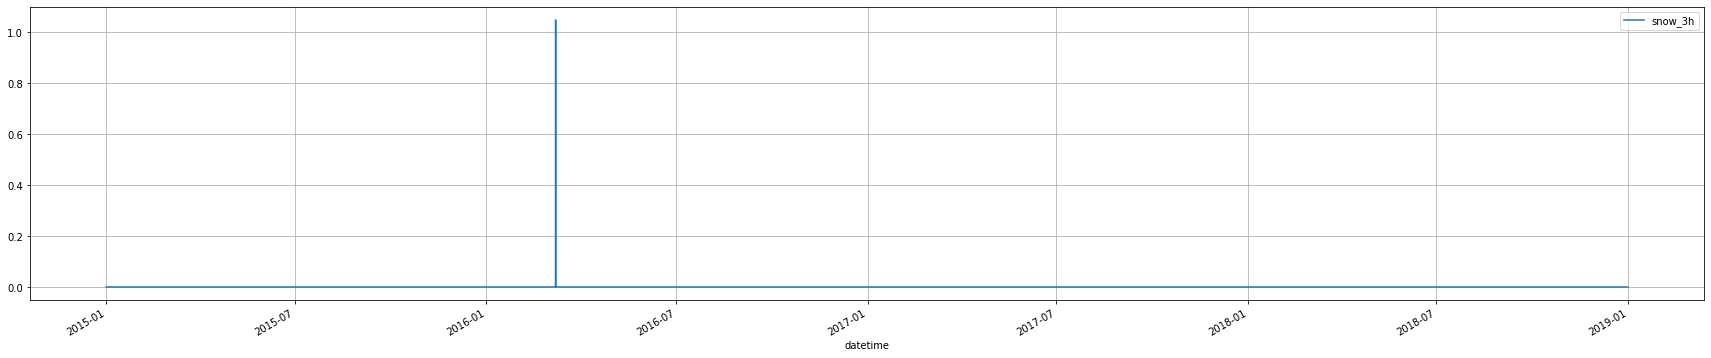

In [64]:
full_df.plot(y=['snow_3h'], figsize=(30, 6), grid=True)

<AxesSubplot:xlabel='datetime'>

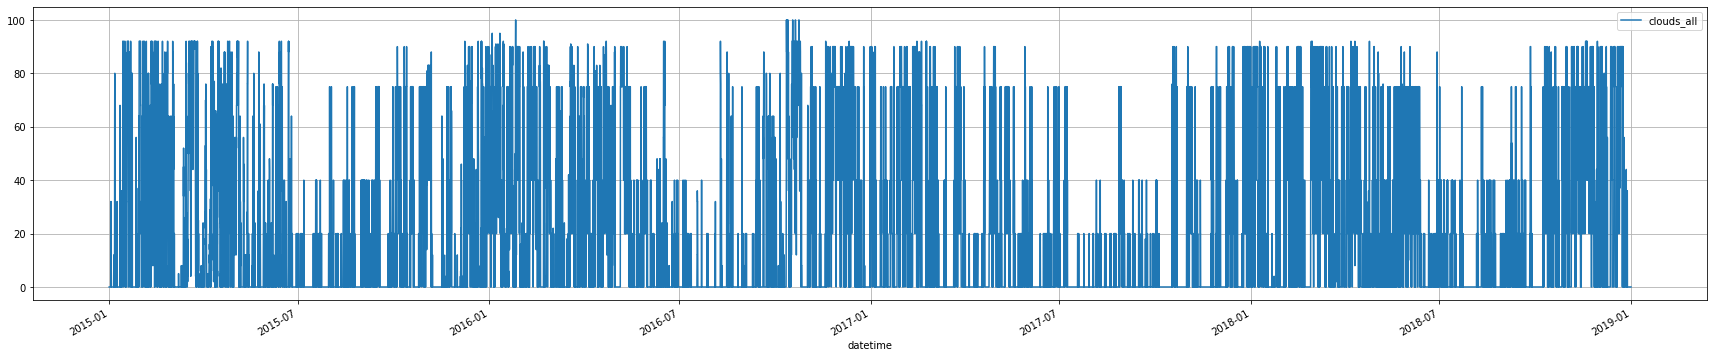

In [65]:
full_df.plot(y=['clouds_all'], figsize=(30, 6), grid=True)

<AxesSubplot:title={'center':'Weather features of each id'}, xlabel='datetime'>

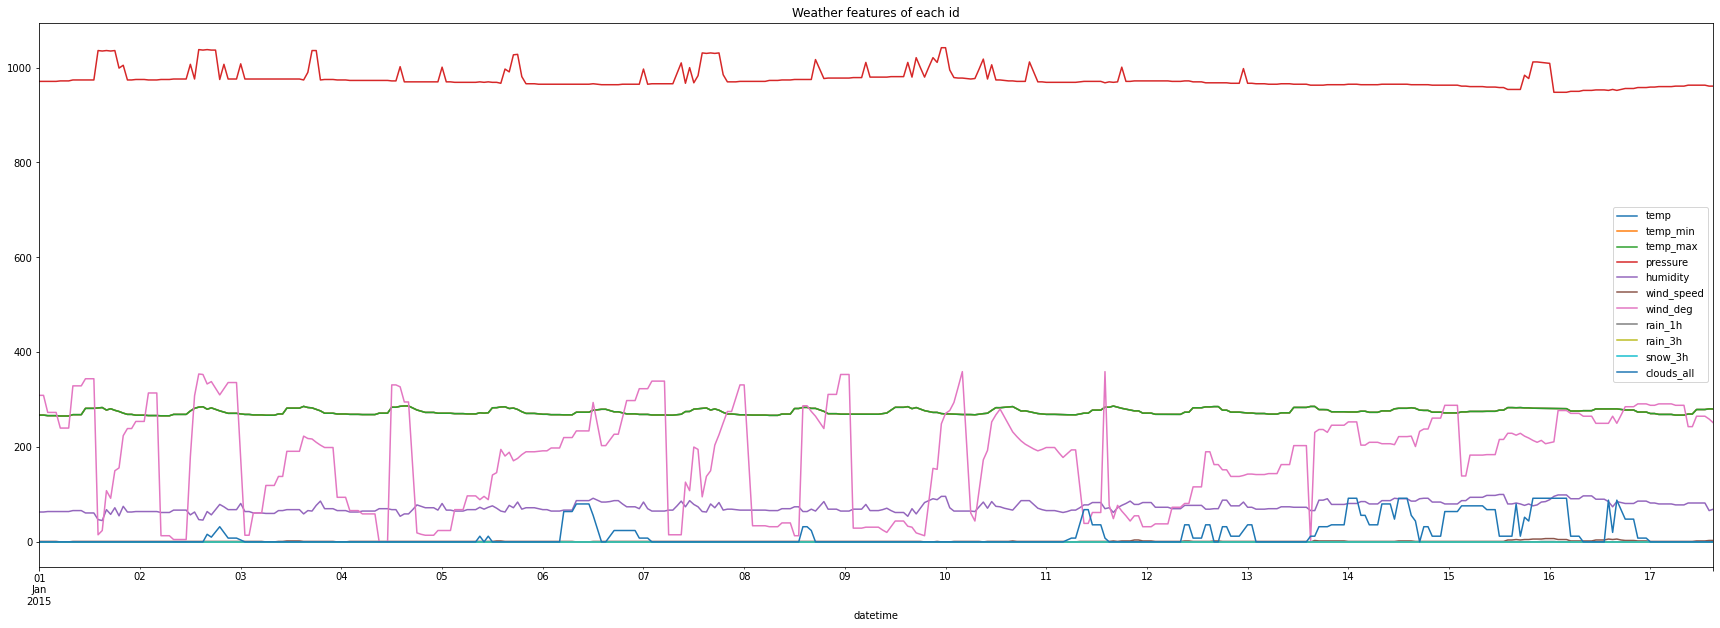

In [66]:
full_df_weather=full_df[['temp','temp_min','temp_max','pressure', 'humidity' ,'wind_speed','wind_deg', 'rain_1h',
                         'rain_3h','snow_3h' ,'clouds_all']]
full_df_weather[:400].plot(figsize=(30,10),title='Weather features of each id')

NameError: name 'sns' is not defined

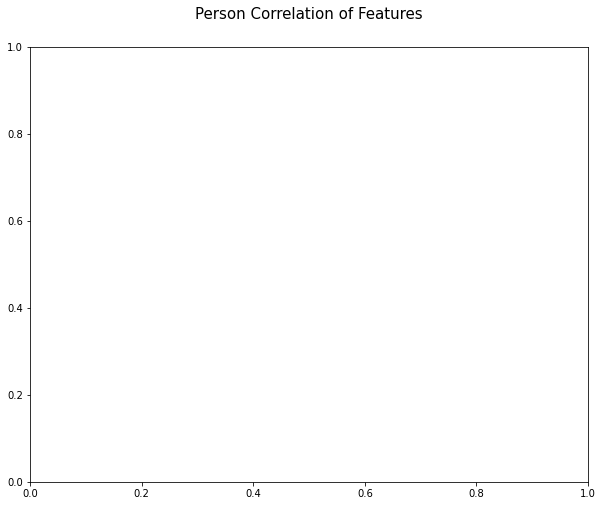

In [67]:
colormap = plt.cm.PuRd
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(full_df_weather.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})


## 3. Find correlation between generated energy type and 'price'

In [68]:
# Identify the correlation between the target variable and the input variable and select the top 10
data_corr = full_df.corr()
data_corr = data_corr.sort_values(by=['price actual'],axis=1, ascending=False)
data_corr = data_corr.iloc[range(20),0]
data_corr = data_corr.sort_values(ascending = False)
data_corr = data_corr.iloc[0:20]
print(data_corr)

price actual                                   1.000000
price day ahead                                0.732151
generation fossil hard coal                    0.465643
generation fossil gas                          0.461448
total load forecast                            0.435888
total load actual                              0.435283
generation fossil brown coal/lignite           0.364008
generation fossil oil                          0.285051
generation other renewable                     0.255562
generation waste                               0.168723
generation biomass                             0.142696
forecast solar day ahead                       0.101379
generation other                               0.099931
generation solar                               0.098505
generation hydro water reservoir               0.071874
generation nuclear                            -0.053036
generation hydro run-of-river and poundage    -0.136723
generation wind onshore                       -0

<AxesSubplot:xlabel='price day ahead'>

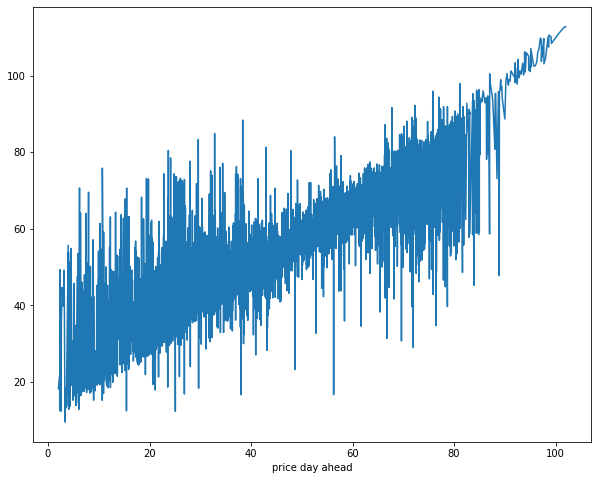

In [69]:
# plot for price day ahead  
fig = plt.figure(figsize=(10,8))
full_df.groupby('price day ahead')['price actual'].mean().plot() # since price day ahead is prediction for the actual price, I will remove this column.

<AxesSubplot:xlabel='generation waste'>

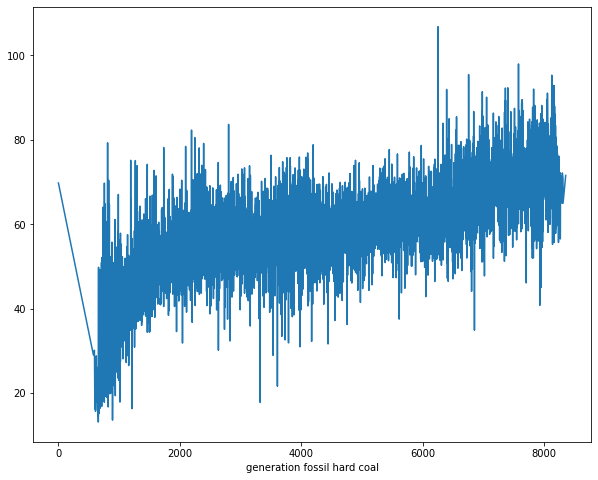

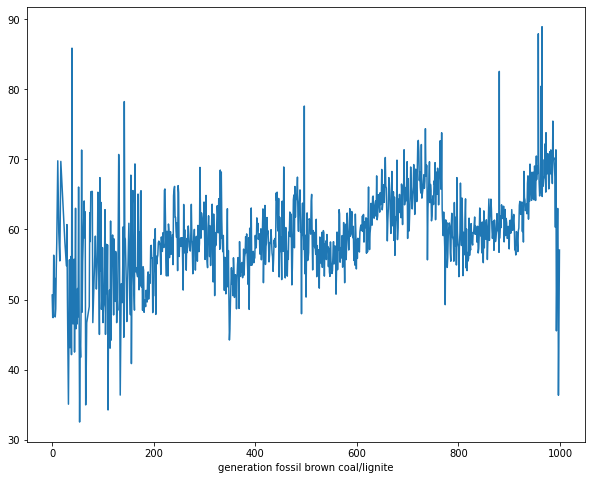

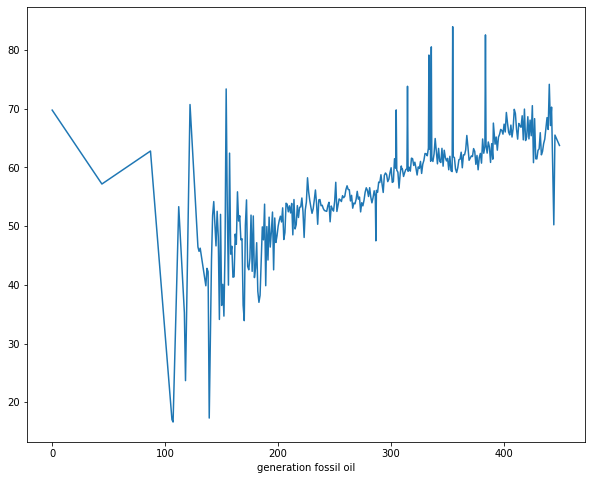

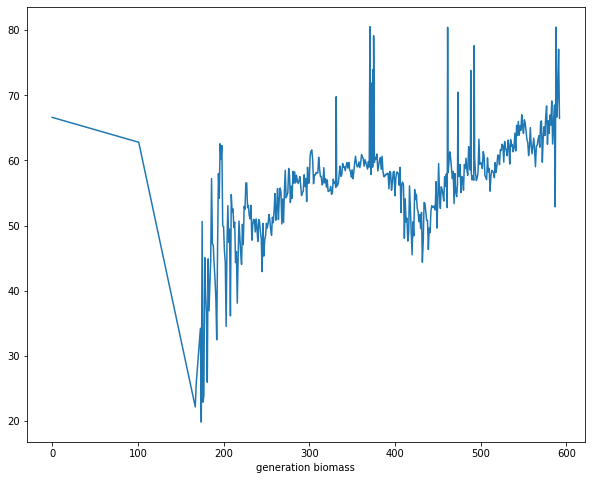

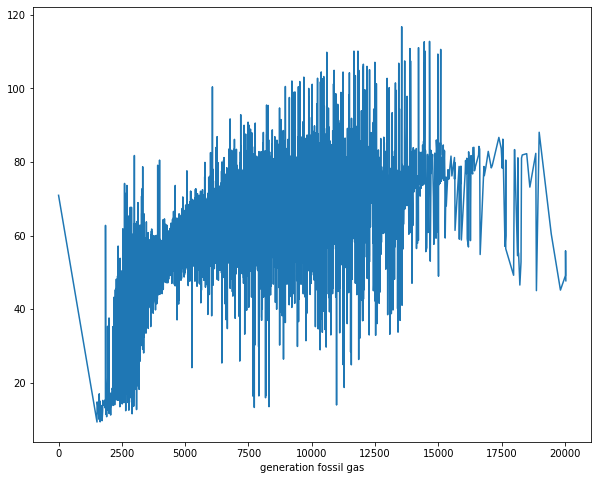

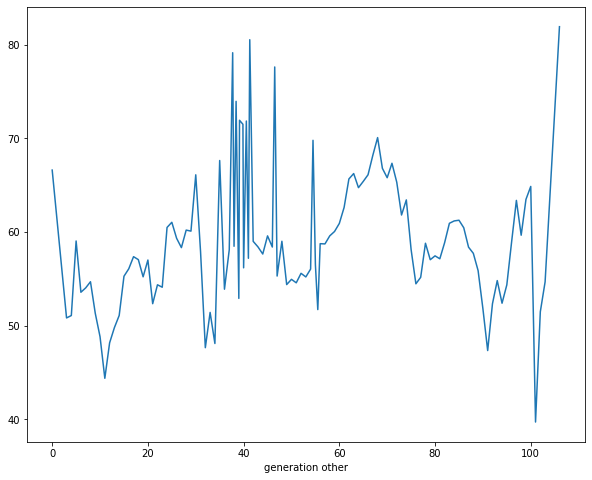

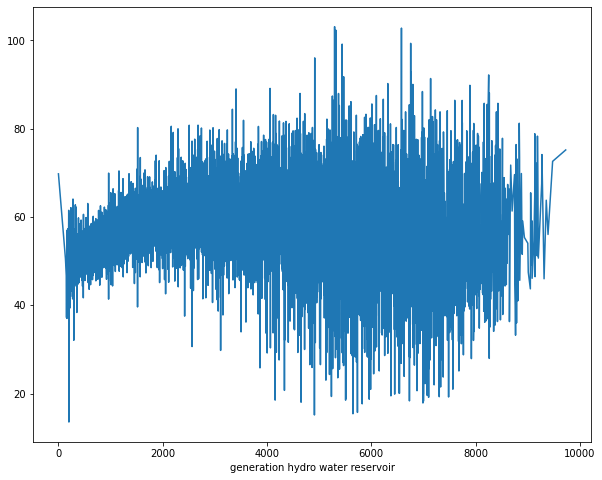

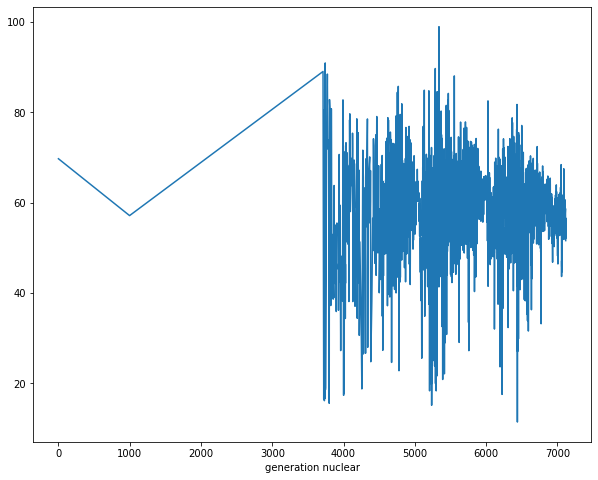

In [70]:
# plot for generation fossil gas 
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil gas')['price actual'].mean().plot()

# plot for generation fossil hard coal 
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil hard coal')['price actual'].mean().plot()

# plot for generation fossil brown coal/lignite
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil brown coal/lignite')['price actual'].mean().plot()

# plot for generation fossil oil
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil oil')['price actual'].mean().plot()

# plot for generation biomass
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation biomass')['price actual'].mean().plot()

# plot for generation fossil gas 
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil gas')['price actual'].mean().plot()

# plot for generation other renewable
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation other renewable')['price actual'].mean().plot()

# plot for generation other
fig = plt.figure(figsize=(10,8))
energy.groupby('generation other')['price actual'].mean().plot()

# plot for generation solar 
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation solar')['price actual'].mean().plot()

# plot for generation hydro water reservoir
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation hydro water reservoir')['price actual'].mean().plot()

# plot for generation nuclear
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation nuclear')['price actual'].mean().plot()

# plot for generation waste
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation waste')['price actual'].mean().plot()

<AxesSubplot:xlabel='generation hydro pumped storage consumption'>

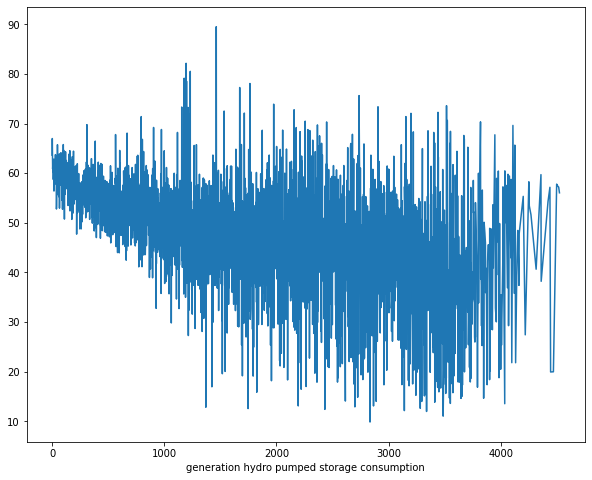

In [71]:
# plot for generation hydro run-of-river and poundage
fig = plt.figure(figsize=(10,8))
energy.groupby('generation hydro run-of-river and poundage')['price actual'].mean().plot()

# plot for generation wind onshore
fig = plt.figure(figsize=(10,8))
energy.groupby('generation wind onshore')['price actual'].mean().plot()

# plot for generation hydro pumped storage consumption
fig = plt.figure(figsize=(10,8))
energy.groupby('generation hydro pumped storage consumption')['price actual'].mean().plot()

# feature engineering
+ fossil gas 합치기 (하나의 column->mean 이용)
+ 

In [72]:
full_df.dtypes

generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation waste                               float64
generation wind onshore                        float64
forecast solar day ahead                       float64
forecast wind onshore day ahead                float64
total load forecast                            float64
total load actual                              float64
price day 

In [73]:
full_df2 = full_df.copy()

In [74]:
full_df2['generation fossil'] = full_df2['generation fossil brown coal/lignite']+full_df2['generation fossil gas'] + full_df2['generation fossil hard coal'] + full_df2['generation fossil oil']

In [75]:
full_df2 = full_df2.drop(['generation fossil brown coal/lignite','generation fossil gas','generation fossil hard coal','generation fossil oil'], axis=1)

+ hydro generation 데이터 3개 중에서는 price와 correlation 이 negative하게 나타났던 'generation hydro run-of-river and poundage','generation hydro pumped storage consumption'을 제거하였다.
+ renewable energy 가 아닌 generation nuclear와 generation other 컬럼도 제거하였다. 

In [76]:
full_df2 = full_df2.drop([ 'generation hydro run-of-river and poundage','generation hydro pumped storage consumption','generation nuclear','generation other'],axis=1)

In [77]:
full_df2.dtypes

generation biomass                  float64
generation hydro water reservoir    float64
generation other renewable          float64
generation solar                    float64
generation waste                    float64
generation wind onshore             float64
forecast solar day ahead            float64
forecast wind onshore day ahead     float64
total load forecast                 float64
total load actual                   float64
price day ahead                     float64
price actual                        float64
temp                                float64
temp_min                            float64
temp_max                            float64
pressure                              int64
humidity                              int64
wind_speed                            int64
wind_deg                              int64
rain_1h                             float64
rain_3h                             float64
snow_3h                             float64
clouds_all                      

## Make new csv file

In [78]:
full_df2.to_csv('energy_weather_dataset.csv')
full_df_energy.to_csv('energy_only_variable_dataset.csv')
full_df_weather.to_csv('weather_only_variable_dataset.csv')

In [79]:
weather_only_variable_df = pd.read_csv('weather_only_variable_dataset.csv')
energy_only_variable_df = pd.read_csv('energy_only_variable_dataset.csv')

In [80]:
weatherOnly = weather_only_variable_df.copy()
energyOnly = energy_only_variable_df.copy()

In [81]:
weatherOnly.head()

datetime     temp  temp_min  temp_max  pressure  humidity  \
0  2015-01-01 00:00:00  267.325   267.325   267.325       971        63   
1  2015-01-01 01:00:00  267.325   267.325   267.325       971        63   
2  2015-01-01 02:00:00  266.186   266.186   266.186       971        64   
3  2015-01-01 03:00:00  266.186   266.186   266.186       971        64   
4  2015-01-01 04:00:00  266.186   266.186   266.186       971        64   

   wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
0           1       309      0.0      0.0      0.0           0  
1           1       309      0.0      0.0      0.0           0  
2           1       273      0.0      0.0      0.0           0  
3           1       273      0.0      0.0      0.0           0  
4           1       273      0.0      0.0      0.0           0

In [82]:
energyOnly.head()

datetime  generation biomass  \
0  2015-01-01 00:00:00               447.0   
1  2015-01-01 01:00:00               449.0   
2  2015-01-01 02:00:00               448.0   
3  2015-01-01 03:00:00               438.0   
4  2015-01-01 04:00:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4                       3840.0                  156.0   

   generation hydro pumped storage consumption  \
0                                        863.0   
1                                        920.0   
2                                       1164.0   
3                                       1503.0   
4                                       1826.0   

   generation hydro run-of-river and poundage  \
0                                      1051.0   
1                                      1009.0   
2                                       973.0   
3                                       949.0   
4                                       953.0   

   generation hydro water reservoir  generation nuclear  generation other  \
0                            1899.0              7096.0              43.0   
1                            1658.0              7096.0              43.0   
2                            1371.0              7099.0              43.0   
3                             779.0              7098.0              43.0   
4                             720.0              7097.0              43.0   

   generation other renewable  generation solar  generation waste  \
0                        73.0              49.0             196.0   
1                        71.0              50.0             195.0   
2                        73.0              50.0             196.0   
3                        75.0              50.0             191.0   
4                        74.0              42.0             189.0   

   generation wind onshore  
0                   6378.0  
1                   5890.0  
2                   5461.0  
3                   5238.0  
4                   4935.0

In [91]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [84]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [85]:
weatherOnly['datetime']= pd.to_datetime(weatherOnly['datetime'])
weatherOnly['year'] = weatherOnly['datetime'].dt.year

energyOnly['datetime']= pd.to_datetime(energyOnly['datetime'])
energyOnly['year'] = energyOnly['datetime'].dt.year

In [86]:
weather_train = weatherOnly[(weatherOnly['year'] == 2015) | (weatherOnly['year'] == 2016) | (weatherOnly['year'] == 2017)]
weather_test = weatherOnly[weatherOnly['year'] == 2018]

energy_train = energyOnly[(energyOnly['year'] == 2015) | (energyOnly['year'] == 2016) | (energyOnly['year'] == 2017)]
energy_test = energyOnly[energyOnly['year'] == 2018]

In [144]:
# generation biomass

In [145]:
X_trainval1 = weather_train.drop(['datetime'], axis=1)
y_trainval1 = energy_train['generation biomass']

X_test1 = weather_test.drop(['datetime'], axis=1)
y_test1 = energy_test['generation biomass']

X_trainval1 = X_trainval1.to_numpy()
y_trainval1 = y_trainval1.to_numpy()
X_test1 = X_test1.to_numpy()
y_test1 = y_test1.to_numpy()

In [146]:
# LinearRegression

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval1, y_trainval1): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval1[train_idx]
        y_train = y_trainval1[train_idx]
        X_valid = X_trainval1[val_idx]
        y_valid = y_trainval1[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the LinearRegression set to the current alpha.
        lr = LinearRegression()
        lr.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lr.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.4883005788432187, test_mse: 4223.7990651288765, test_mae: 52.797066932759826
0.4883005788432187
mean_score:0.4883005788432187, test_mse: 4223.7990651288765, test_mae: 52.797066932759826
mean_score:0.4883005788432187, test_mse: 4223.7990651288765, test_mae: 52.797066932759826
mean_score:0.4883005788432187, test_mse: 4223.7990651288765, test_mae: 52.797066932759826
mean_score:0.4883005788432187, test_mse: 4223.7990651288765, test_mae: 52.797066932759826
mean_score:0.4883005788432187, test_mse: 4223.7990651288765, test_mae: 52.797066932759826
mean_score:0.4883005788432187, test_mse: 4223.7990651288765, test_mae: 52.797066932759826
mean_score:0.4883005788432187, test_mse: 4223.7990651288765, test_mae: 52.797066932759826
mean_score:0.4883005788432187, test_mse: 4223.7990651288765, test_mae: 52.797066932759826
mean_score:0.4883005788432187, test_mse: 4223.7990651288765, test_mae: 52.797066932759826
mean_score:0.4883005788432187, test_mse: 4223.7990651288765, test_mae: 52.7970669

In [147]:
linear_best_parameter1 = best_parameters

In [148]:
# Ridge

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval1, y_trainval1): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval1[train_idx]
        y_train = y_trainval1[train_idx]
        X_valid = X_trainval1[val_idx]
        y_valid = y_trainval1[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Ridge set to the current alpha.
        ridge = Ridge(alpha = alpha, random_state=0, max_iter=10000)
        ridge.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = ridge.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.4883005788613298, test_mse: 4223.799082448752, test_mae: 52.79706726434194
0.4883005788613298
mean_score:0.48830057887014783, test_mse: 4223.799090889678, test_mae: 52.79706742593887
0.48830057887014783
mean_score:0.48830057888325296, test_mse: 4223.799103444361, test_mae: 52.79706766628997
0.48830057888325296
mean_score:0.48830057890272255, test_mse: 4223.7991221177235, test_mae: 52.797068023775836
0.48830057890272255
mean_score:0.48830057893163004, test_mse: 4223.799149891863, test_mae: 52.79706855548128
0.48830057893163004
mean_score:0.4883005789745146, test_mse: 4223.799191202398, test_mae: 52.797069346310174
0.4883005789745146
mean_score:0.48830057903805313, test_mse: 4223.7992526470625, test_mae: 52.797070522541766
0.48830057903805313
mean_score:0.4883005791320132, test_mse: 4223.799344039907, test_mae: 52.79707227199141
0.4883005791320132
mean_score:0.4883005792705612, test_mse: 4223.7994799798635, test_mae: 52.79707487399277
0.4883005792705612
mean_score:0.48830057

In [149]:
ridge_best_parameter1 = best_parameters

In [150]:
# Lasso

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval1, y_trainval1): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval1[train_idx]
        y_train = y_trainval1[train_idx]
        X_valid = X_trainval1[val_idx]
        y_valid = y_trainval1[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Lasso set to the current alpha.
        lasso = Lasso(alpha = alpha, random_state=0, max_iter=10000)
        lasso.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lasso.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.4883006116548073, test_mse: 4223.803739705288, test_mae: 52.79717134458623
0.4883006116548073
mean_score:0.4883006269790432, test_mse: 4223.806023094259, test_mae: 52.79722222869968
0.4883006269790432
mean_score:0.4883006489620108, test_mse: 4223.809425669672, test_mae: 52.79729791056021
0.4883006489620108
mean_score:0.48830067986674647, test_mse: 4223.814500612363, test_mae: 52.7974104748704
0.48830067986674647
mean_score:0.48830072186832796, test_mse: 4223.822080091775, test_mae: 52.79757789536717
0.48830072186832796
mean_score:0.4883007755173717, test_mse: 4223.83342466867, test_mae: 52.797826941767624
0.4883007755173717
mean_score:0.48830083603130603, test_mse: 4223.850449115289, test_mae: 52.79819731574753
0.48830083603130603
mean_score:0.48830088302235036, test_mse: 4223.87610922254, test_mae: 52.79874817580568
0.48830088302235036
mean_score:0.4883008579328913, test_mse: 4223.915024304768, test_mae: 52.799567464885136
mean_score:0.4883006102558878, test_mse: 4223.974

In [151]:
lasso_best_parameter1 = best_parameters

In [152]:
# generation hydro water reservoir

In [153]:
X_trainval2 = weather_train.drop(['datetime'], axis=1)
y_trainval2 = energy_train['generation hydro water reservoir']

X_test2 = weather_test.drop(['datetime'], axis=1)
y_test2 = energy_test['generation hydro water reservoir']

X_trainval2 = X_trainval2.to_numpy()
y_trainval2 = y_trainval2.to_numpy()
X_test2 = X_test2.to_numpy()
y_test2 = y_test2.to_numpy()

In [154]:
# LinearRegression

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval2, y_trainval2): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval2[train_idx]
        y_train = y_trainval2[train_idx]
        X_valid = X_trainval2[val_idx]
        y_valid = y_trainval2[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the LinearRegression set to the current alpha.
        lr = LinearRegression()
        lr.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lr.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.08352303586338758, test_mse: 3215151.0293255746, test_mae: 1440.5193740527675
0.08352303586338758
mean_score:0.08352303586338758, test_mse: 3215151.0293255746, test_mae: 1440.5193740527675
mean_score:0.08352303586338758, test_mse: 3215151.0293255746, test_mae: 1440.5193740527675
mean_score:0.08352303586338758, test_mse: 3215151.0293255746, test_mae: 1440.5193740527675
mean_score:0.08352303586338758, test_mse: 3215151.0293255746, test_mae: 1440.5193740527675
mean_score:0.08352303586338758, test_mse: 3215151.0293255746, test_mae: 1440.5193740527675
mean_score:0.08352303586338758, test_mse: 3215151.0293255746, test_mae: 1440.5193740527675
mean_score:0.08352303586338758, test_mse: 3215151.0293255746, test_mae: 1440.5193740527675
mean_score:0.08352303586338758, test_mse: 3215151.0293255746, test_mae: 1440.5193740527675
mean_score:0.08352303586338758, test_mse: 3215151.0293255746, test_mae: 1440.5193740527675
mean_score:0.08352303586338758, test_mse: 3215151.0293255746, test_mae

In [155]:
linear_best_parameter2 = best_parameters

In [156]:
# Ridge

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval2, y_trainval2): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval2[train_idx]
        y_train = y_trainval2[train_idx]
        X_valid = X_trainval2[val_idx]
        y_valid = y_trainval2[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Ridge set to the current alpha.
        ridge = Ridge(alpha = alpha, random_state=0, max_iter=10000)
        ridge.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = ridge.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.08352303596022692, test_mse: 3215151.0501931557, test_mae: 1440.5193835073699
0.08352303596022692
mean_score:0.0835230360073973, test_mse: 3215151.060363075, test_mae: 1440.5193881150815
0.0835230360073973
mean_score:0.08352303607752627, test_mse: 3215151.0754893976, test_mae: 1440.5193949683598
0.08352303607752627
mean_score:0.08352303618176667, test_mse: 3215151.0979877305, test_mae: 1440.5194051615756
0.08352303618176667
mean_score:0.0835230363366625, test_mse: 3215151.1314510317, test_mae: 1440.5194203224264
0.0835230363366625
mean_score:0.08352303656672388, test_mse: 3215151.1812235364, test_mae: 1440.5194428718373
0.08352303656672388
mean_score:0.0835230369081903, test_mse: 3215151.2552545327, test_mae: 1440.5194764105029
0.0835230369081903
mean_score:0.08352303741448801, test_mse: 3215151.3653685786, test_mae: 1440.519526293761
0.08352303741448801
mean_score:0.08352303816402859, test_mse: 3215151.5291555384, test_mae: 1440.5196004865181
0.08352303816402859
mean_scor

In [157]:
ridge_best_parameter2 = best_parameters

In [158]:
# Lasso

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval2, y_trainval2): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval2[train_idx]
        y_train = y_trainval2[train_idx]
        X_valid = X_trainval2[val_idx]
        y_valid = y_trainval2[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Lasso set to the current alpha.
        lasso = Lasso(alpha = alpha, random_state=0, max_iter=10000)
        lasso.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lasso.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.08352303644785897, test_mse: 3215151.188641971, test_mae: 1440.5194505565016
0.08352303644785897
mean_score:0.08352303673116082, test_mse: 3215151.2662893957, test_mae: 1440.519487840121
0.08352303673116082
mean_score:0.08352303715060383, test_mse: 3215151.381784546, test_mae: 1440.5195432936744
0.08352303715060383
mean_score:0.08352303776892396, test_mse: 3215151.5536024193, test_mae: 1440.5196257829377
0.08352303776892396
mean_score:0.08352303868030124, test_mse: 3215151.809165598, test_mae: 1440.5197484620119
0.08352303868030124
mean_score:0.08352304001393718, test_mse: 3215152.1893487466, test_mae: 1440.5199309279067
0.08352304001393718
mean_score:0.08352304195268985, test_mse: 3215152.7549729156, test_mae: 1440.5202023172867
0.08352304195268985
mean_score:0.08352304472834335, test_mse: 3215153.5966069205, test_mae: 1440.5206059663083
0.08352304472834335
mean_score:0.08352304862959528, test_mse: 3215154.84919443, test_mae: 1440.5212063305482
0.08352304862959528
mean_sc

In [159]:
lasso_best_parameter2 = best_parameters

In [160]:
# generation other renewable

In [161]:
X_trainval3 = weather_train.drop(['datetime'], axis=1)
y_trainval3 = energy_train['generation other renewable']

X_test3 = weather_test.drop(['datetime'], axis=1)
y_test3 = energy_test['generation other renewable']

X_trainval3 = X_trainval3.to_numpy()
y_trainval3 = y_trainval3.to_numpy()
X_test3 = X_test3.to_numpy()
y_test3 = y_test3.to_numpy()

In [162]:
# LinearRegression

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval3, y_trainval3): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval3[train_idx]
        y_train = y_trainval3[train_idx]
        X_valid = X_trainval3[val_idx]
        y_valid = y_trainval3[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the LinearRegression set to the current alpha.
        lr = LinearRegression()
        lr.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lr.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.6131349514813859, test_mse: 70.81878699974737, test_mae: 6.417167265747744
0.6131349514813859
mean_score:0.6131349514813859, test_mse: 70.81878699974737, test_mae: 6.417167265747744
mean_score:0.6131349514813859, test_mse: 70.81878699974737, test_mae: 6.417167265747744
mean_score:0.6131349514813859, test_mse: 70.81878699974737, test_mae: 6.417167265747744
mean_score:0.6131349514813859, test_mse: 70.81878699974737, test_mae: 6.417167265747744
mean_score:0.6131349514813859, test_mse: 70.81878699974737, test_mae: 6.417167265747744
mean_score:0.6131349514813859, test_mse: 70.81878699974737, test_mae: 6.417167265747744
mean_score:0.6131349514813859, test_mse: 70.81878699974737, test_mae: 6.417167265747744
mean_score:0.6131349514813859, test_mse: 70.81878699974737, test_mae: 6.417167265747744
mean_score:0.6131349514813859, test_mse: 70.81878699974737, test_mae: 6.417167265747744
mean_score:0.6131349514813859, test_mse: 70.81878699974737, test_mae: 6.417167265747744
mean_score:0.

In [163]:
linear_best_parameter3 = best_parameters

In [164]:
# Ridge

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval3, y_trainval3): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval3[train_idx]
        y_train = y_trainval3[train_idx]
        X_valid = X_trainval3[val_idx]
        y_valid = y_trainval3[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Ridge set to the current alpha.
        ridge = Ridge(alpha = alpha, random_state=0, max_iter=10000)
        ridge.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = ridge.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.6131349515710875, test_mse: 70.81878708639816, test_mae: 6.417167261467907
0.6131349515710875
mean_score:0.6131349516148031, test_mse: 70.81878712862762, test_mae: 6.417167259382122
0.6131349516148031
mean_score:0.6131349516798228, test_mse: 70.81878719143769, test_mae: 6.41716725627983
0.6131349516798228
mean_score:0.6131349517765281, test_mse: 70.81878728485846, test_mae: 6.4171672516656395
0.6131349517765281
mean_score:0.6131349519203586, test_mse: 70.81878742380808, test_mae: 6.417167244802733
0.6131349519203586
mean_score:0.613134952134276, test_mse: 70.81878763047528, test_mae: 6.417167234595221
0.613134952134276
mean_score:0.6131349524524261, test_mse: 70.81878793786257, test_mae: 6.417167219413156
0.6131349524524261
mean_score:0.6131349529255821, test_mse: 70.81878839505656, test_mae: 6.417167196832303
0.6131349529255821
mean_score:0.6131349536292315, test_mse: 70.81878907506693, test_mae: 6.417167163247115
0.6131349536292315
mean_score:0.6131349546755851, test_mse

In [165]:
ridge_best_parameter3 = best_parameters

In [166]:
# Lasso

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval3, y_trainval3): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval3[train_idx]
        y_train = y_trainval3[train_idx]
        X_valid = X_trainval3[val_idx]
        y_valid = y_trainval3[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Lasso set to the current alpha.
        lasso = Lasso(alpha = alpha, random_state=0, max_iter=10000)
        lasso.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lasso.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.6131351092866184, test_mse: 70.81943320817308, test_mae: 6.417140157506734
0.6131351092866184
mean_score:0.6131351561943307, test_mse: 70.81975333664964, test_mae: 6.417126945833095
0.6131351561943307
mean_score:0.6131351897258112, test_mse: 70.82023574212577, test_mae: 6.417107296529824
0.6131351897258112
mean_score:0.6131351593146992, test_mse: 70.82096707771643, test_mae: 6.417078074366469
mean_score:0.6131349353314084, test_mse: 70.82208580918548, test_mae: 6.417034602514021
mean_score:0.6131342104341956, test_mse: 70.82381748060197, test_mae: 6.41697250399345
mean_score:0.6131322599472426, test_mse: 70.82654357053211, test_mae: 6.4168820090978
mean_score:0.6131274368970285, test_mse: 70.83093100482385, test_mae: 6.4167689872681635
mean_score:0.6131160055523542, test_mse: 70.83819271909044, test_mae: 6.416615709662866
mean_score:0.613089584145728, test_mse: 70.85062147825265, test_mae: 6.4165152545821815
mean_score:0.6130294808036068, test_mse: 70.87270853837144, test_

In [167]:
lasso_best_parameter3 = best_parameters

In [168]:
# generation solar

In [169]:
X_trainval4 = weather_train.drop(['datetime'], axis=1)
y_trainval4 = energy_train['generation solar']

X_test4 = weather_test.drop(['datetime'], axis=1)
y_test4 = energy_test['generation solar']

X_trainval4 = X_trainval4.to_numpy()
y_trainval4 = y_trainval4.to_numpy()
X_test4 = X_test4.to_numpy()
y_test4 = y_test4.to_numpy()

In [170]:
# LinearRegression

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval4, y_trainval4): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval4[train_idx]
        y_train = y_trainval4[train_idx]
        X_valid = X_trainval4[val_idx]
        y_valid = y_trainval4[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the LinearRegression set to the current alpha.
        lr = LinearRegression()
        lr.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lr.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.1899785521257053, test_mse: 2316559.9882539017, test_mae: 1243.2376460205946
0.1899785521257053
mean_score:0.1899785521257053, test_mse: 2316559.9882539017, test_mae: 1243.2376460205946
mean_score:0.1899785521257053, test_mse: 2316559.9882539017, test_mae: 1243.2376460205946
mean_score:0.1899785521257053, test_mse: 2316559.9882539017, test_mae: 1243.2376460205946
mean_score:0.1899785521257053, test_mse: 2316559.9882539017, test_mae: 1243.2376460205946
mean_score:0.1899785521257053, test_mse: 2316559.9882539017, test_mae: 1243.2376460205946
mean_score:0.1899785521257053, test_mse: 2316559.9882539017, test_mae: 1243.2376460205946
mean_score:0.1899785521257053, test_mse: 2316559.9882539017, test_mae: 1243.2376460205946
mean_score:0.1899785521257053, test_mse: 2316559.9882539017, test_mae: 1243.2376460205946
mean_score:0.1899785521257053, test_mse: 2316559.9882539017, test_mae: 1243.2376460205946
mean_score:0.1899785521257053, test_mse: 2316559.9882539017, test_mae: 1243.23764

In [171]:
linear_best_parameter4 = best_parameters

In [172]:
# Ridge

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval4, y_trainval4): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval4[train_idx]
        y_train = y_trainval4[train_idx]
        X_valid = X_trainval4[val_idx]
        y_valid = y_trainval4[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Ridge set to the current alpha.
        ridge = Ridge(alpha = alpha, random_state=0, max_iter=10000)
        ridge.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = ridge.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.1899785523371677, test_mse: 2316560.0078585753, test_mae: 1243.2376659326908
0.1899785523371677
mean_score:0.1899785524402064, test_mse: 2316560.0174129806, test_mae: 1243.2376756368733
0.1899785524402064
mean_score:0.18997855259343957, test_mse: 2316560.0316237775, test_mae: 1243.2376900703862
0.18997855259343957
mean_score:0.18997855282130321, test_mse: 2316560.0527603105, test_mae: 1243.237711538055
0.18997855282130321
mean_score:0.1899785531601098, test_mse: 2316560.0841979384, test_mae: 1243.2377434679292
0.1899785531601098
mean_score:0.18997855366379932, test_mse: 2316560.1309571154, test_mae: 1243.237790958654
0.18997855366379932
mean_score:0.18997855441244166, test_mse: 2316560.2005052622, test_mae: 1243.2378615935534
0.18997855441244166
mean_score:0.18997855552478365, test_mse: 2316560.303949589, test_mae: 1243.2379666513484
0.18997855552478365
mean_score:0.18997855717667747, test_mse: 2316560.4578115786, test_mae: 1243.2381229066887
0.18997855717667747
mean_score

In [173]:
ridge_best_parameter4 = best_parameters

In [174]:
# Lasso

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval4, y_trainval4): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval4[train_idx]
        y_train = y_trainval4[train_idx]
        X_valid = X_trainval4[val_idx]
        y_valid = y_trainval4[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Lasso set to the current alpha.
        lasso = Lasso(alpha = alpha, random_state=0, max_iter=10000)
        lasso.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lasso.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.18997855256051052, test_mse: 2316560.174029117, test_mae: 1243.2378643681777
0.18997855256051052
mean_score:0.18997855277064746, test_mse: 2316560.2645707973, test_mae: 1243.2379707785271
0.18997855277064746
mean_score:0.18997855307804123, test_mse: 2316560.3992640986, test_mae: 1243.238129067592
0.18997855307804123
mean_score:0.18997855353293264, test_mse: 2316560.5995938163, test_mae: 1243.238364477506
0.18997855353293264
mean_score:0.18997855419797505, test_mse: 2316560.8975854316, test_mae: 1243.23871461291
0.18997855419797505
mean_score:0.18997855516142456, test_mse: 2316561.3408733895, test_mae: 1243.2392353844634
0.18997855516142456
mean_score:0.18997855653729884, test_mse: 2316562.0003544926, test_mae: 1243.2400099504134
0.18997855653729884
mean_score:0.18997855845698103, test_mse: 2316562.981582889, test_mae: 1243.2411619953787
0.18997855845698103
mean_score:0.18997856103131397, test_mse: 2316564.4417889593, test_mae: 1243.2428754802822
0.18997856103131397
mean_sc

In [175]:
lasso_best_parameter4 = best_parameters

In [176]:
# generation waste

In [177]:
X_trainval5 = weather_train.drop(['datetime'], axis=1)
y_trainval5 = energy_train['generation waste']

X_test5 = weather_test.drop(['datetime'], axis=1)
y_test5 = energy_test['generation waste']

X_trainval5 = X_trainval5.to_numpy()
y_trainval5 = y_trainval5.to_numpy()
X_test5 = X_test5.to_numpy()
y_test5 = y_test5.to_numpy()

In [178]:
# LinearRegression

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval5, y_trainval5): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval5[train_idx]
        y_train = y_trainval5[train_idx]
        X_valid = X_trainval5[val_idx]
        y_valid = y_trainval5[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the LinearRegression set to the current alpha.
        lr = LinearRegression()
        lr.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lr.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.38067392754429885, test_mse: 1612.0881793061067, test_mae: 32.54632927980654
0.38067392754429885
mean_score:0.38067392754429885, test_mse: 1612.0881793061067, test_mae: 32.54632927980654
mean_score:0.38067392754429885, test_mse: 1612.0881793061067, test_mae: 32.54632927980654
mean_score:0.38067392754429885, test_mse: 1612.0881793061067, test_mae: 32.54632927980654
mean_score:0.38067392754429885, test_mse: 1612.0881793061067, test_mae: 32.54632927980654
mean_score:0.38067392754429885, test_mse: 1612.0881793061067, test_mae: 32.54632927980654
mean_score:0.38067392754429885, test_mse: 1612.0881793061067, test_mae: 32.54632927980654
mean_score:0.38067392754429885, test_mse: 1612.0881793061067, test_mae: 32.54632927980654
mean_score:0.38067392754429885, test_mse: 1612.0881793061067, test_mae: 32.54632927980654
mean_score:0.38067392754429885, test_mse: 1612.0881793061067, test_mae: 32.54632927980654
mean_score:0.38067392754429885, test_mse: 1612.0881793061067, test_mae: 32.54632

In [179]:
linear_best_parameter5 = best_parameters

In [180]:
# Ridge

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval5, y_trainval5): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval5[train_idx]
        y_train = y_trainval5[train_idx]
        X_valid = X_trainval5[val_idx]
        y_valid = y_trainval5[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Ridge set to the current alpha.
        ridge = Ridge(alpha = alpha, random_state=0, max_iter=10000)
        ridge.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = ridge.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.38067392758579155, test_mse: 1612.0881815636849, test_mae: 32.546329367623244
0.38067392758579155
mean_score:0.3806739276060107, test_mse: 1612.0881826639243, test_mae: 32.54632941042081
0.3806739276060107
mean_score:0.38067392763608127, test_mse: 1612.0881843003706, test_mae: 32.54632947407574
0.38067392763608127
mean_score:0.3806739276808008, test_mse: 1612.088186734351, test_mae: 32.54632956875281
0.3806739276808008
mean_score:0.38067392774730113, test_mse: 1612.0881903545555, test_mae: 32.546329709570415
0.38067392774730113
mean_score:0.38067392784618137, test_mse: 1612.0881957391157, test_mae: 32.5463299190146
0.38067392784618137
mean_score:0.3806739279931862, test_mse: 1612.0882037479428, test_mae: 32.54633023052927
0.3806739279931862
mean_score:0.3806739282116908, test_mse: 1612.088215660091, test_mae: 32.54633069385552
0.3806739282116908
mean_score:0.38067392853636717, test_mse: 1612.0882333780946, test_mae: 32.54633138297213
0.38067392853636717
mean_score:0.380673

In [181]:
ridge_best_parameter5 = best_parameters

In [182]:
# Lasso

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval5, y_trainval5): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval5[train_idx]
        y_train = y_trainval5[train_idx]
        X_valid = X_trainval5[val_idx]
        y_valid = y_trainval5[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Lasso set to the current alpha.
        lasso = Lasso(alpha = alpha, random_state=0, max_iter=10000)
        lasso.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lasso.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.38067393725838633, test_mse: 1612.090371740067, test_mae: 32.54642028376267
0.38067393725838633
mean_score:0.3806739398590623, test_mse: 1612.0914457025126, test_mae: 32.54646463287051
0.3806739398590623
mean_score:0.38067394113914377, test_mse: 1612.0930497145487, test_mae: 32.54653120247626
0.38067394113914377
mean_score:0.3806739373024914, test_mse: 1612.095450524263, test_mae: 32.546630318683604
mean_score:0.3806739189476451, test_mse: 1612.0990535943977, test_mae: 32.54677809660153
mean_score:0.38067386357737476, test_mse: 1612.1044855122443, test_mae: 32.54699977607156
mean_score:0.3806737192206676, test_mse: 1612.1127245610414, test_mae: 32.54733352132965
mean_score:0.3806733673921471, test_mse: 1612.1253322771229, test_mae: 32.54783560629714
mean_score:0.3806725406423418, test_mse: 1612.1448683494568, test_mae: 32.548593849059856
mean_score:0.38067063974183457, test_mse: 1612.175658114146, test_mae: 32.549749429547944
mean_score:0.38066632731648803, test_mse: 1612.

In [183]:
lasso_best_parameter5 = best_parameters

In [184]:
# generation wind onshore

In [185]:
X_trainval6 = weather_train.drop(['datetime'], axis=1)
y_trainval6 = energy_train['generation wind onshore']

X_test6 = weather_test.drop(['datetime'], axis=1)
y_test6 = energy_test['generation wind onshore']

X_trainval6 = X_trainval6.to_numpy()
y_trainval6 = y_trainval6.to_numpy()
X_test6 = X_test6.to_numpy()
y_test6 = y_test6.to_numpy()

In [186]:
# LinearRegression

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval6, y_trainval6): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval6[train_idx]
        y_train = y_trainval6[train_idx]
        X_valid = X_trainval6[val_idx]
        y_valid = y_trainval6[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the LinearRegression set to the current alpha.
        lr = LinearRegression()
        lr.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lr.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.10609595680029274, test_mse: 8879664.446924858, test_mae: 2384.134303656531
0.10609595680029274
mean_score:0.10609595680029274, test_mse: 8879664.446924858, test_mae: 2384.134303656531
mean_score:0.10609595680029274, test_mse: 8879664.446924858, test_mae: 2384.134303656531
mean_score:0.10609595680029274, test_mse: 8879664.446924858, test_mae: 2384.134303656531
mean_score:0.10609595680029274, test_mse: 8879664.446924858, test_mae: 2384.134303656531
mean_score:0.10609595680029274, test_mse: 8879664.446924858, test_mae: 2384.134303656531
mean_score:0.10609595680029274, test_mse: 8879664.446924858, test_mae: 2384.134303656531
mean_score:0.10609595680029274, test_mse: 8879664.446924858, test_mae: 2384.134303656531
mean_score:0.10609595680029274, test_mse: 8879664.446924858, test_mae: 2384.134303656531
mean_score:0.10609595680029274, test_mse: 8879664.446924858, test_mae: 2384.134303656531
mean_score:0.10609595680029274, test_mse: 8879664.446924858, test_mae: 2384.134303656531
m

In [187]:
linear_best_parameter6 = best_parameters

In [188]:
# Ridge

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval6, y_trainval6): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval6[train_idx]
        y_train = y_trainval6[train_idx]
        X_valid = X_trainval6[val_idx]
        y_valid = y_trainval6[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Ridge set to the current alpha.
        ridge = Ridge(alpha = alpha, random_state=0, max_iter=10000)
        ridge.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = ridge.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.10609595685510773, test_mse: 8879664.447904278, test_mae: 2384.134304248087
0.10609595685510773
mean_score:0.10609595688182179, test_mse: 8879664.448381603, test_mae: 2384.134304536383
0.10609595688182179
mean_score:0.10609595692155502, test_mse: 8879664.44909155, test_mae: 2384.1343049651814
0.10609595692155502
mean_score:0.10609595698065208, test_mse: 8879664.4501475, test_mae: 2384.134305602956
0.10609595698065208
mean_score:0.10609595706854998, test_mse: 8879664.451718071, test_mae: 2384.1343065515516
0.10609595706854998
mean_score:0.10609595719928411, test_mse: 8879664.454054078, test_mae: 2384.1343079624485
0.10609595719928411
mean_score:0.10609595739372993, test_mse: 8879664.45752857, test_mae: 2384.1343100609533
0.10609595739372993
mean_score:0.10609595768293512, test_mse: 8879664.46269643, test_mae: 2384.1343131821764
0.10609595768293512
mean_score:0.10609595811307578, test_mse: 8879664.47038299, test_mae: 2384.1343178245525
0.10609595811307578
mean_score:0.106095

In [189]:
ridge_best_parameter6 = best_parameters

In [ ]:
# Lasso

scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval6, y_trainval6): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval6[train_idx]
        y_train = y_trainval6[train_idx]
        X_valid = X_trainval6[val_idx]
        y_valid = y_trainval6[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Lasso set to the current alpha.
        lasso = Lasso(alpha = alpha, random_state=0, max_iter=10000)
        lasso.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lasso.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = {'alpha': alpha}

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.1060959568346443, test_mse: 8879664.537086103, test_mae: 2384.134338828242
0.1060959568346443
mean_score:0.10609595685129787, test_mse: 8879664.581030648, test_mae: 2384.1343559696047
0.10609595685129787
mean_score:0.10609595687613582, test_mse: 8879664.64638418, test_mae: 2384.1343814638008
0.10609595687613582
mean_score:0.1060959569126251, test_mse: 8879664.743609237, test_mae: 2384.1344193847526
0.1060959569126251


In [ ]:
lasso_best_parameter6 = best_parameters